In [28]:
#CONTROL DIFUSO API EDITADO POR Alejandro Rios Gonzalez

#Eliman las advertencias
import warnings
warnings.filterwarnings('ignore')

#Importar librerarias
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline


In [29]:
#Se crean los objetos antecedentes y consecuente a partir de las
#Variables del universo y las funciones de membresía
calidad = ctrl.Antecedent(np.arange(0, 11, 1), 'calidad')
servicio = ctrl.Antecedent(np.arange(0, 11, 1), 'servicio')
propina = ctrl.Consequent(np.arange(0, 26, 1), 'propina')

#La población de la función de membresía automática es posible con .automf (3, 5 o 7)
calidad.automf(3)
servicio.automf(3)

#Las funciones de memebresía personalizadas se pueden construir interactivamente con la 
#API Pythonic
propina['bajo'] = fuzz.trimf(propina.universe, [0, 0, 13])
propina['medio'] = fuzz.trimf(propina.universe, [0, 13, 25])
propina['alto'] = fuzz.trimf(propina.universe, [13, 25, 25])



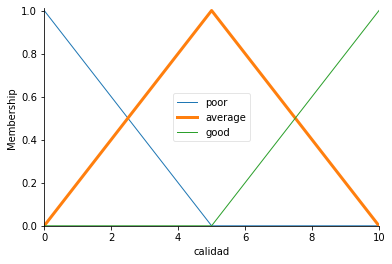

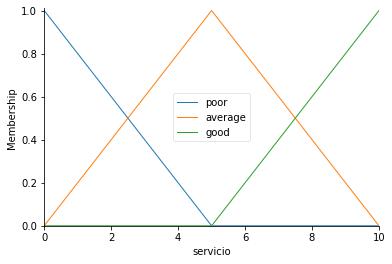

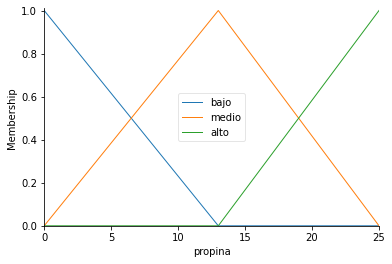

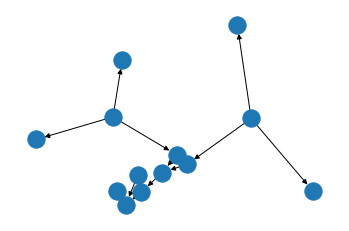

In [30]:
#Visualización con .view()
calidad['average'].view()
servicio.view()
propina.view()

#creación de reglas
regla1 = ctrl.Rule(calidad['poor'] | servicio['poor'], propina['bajo'])
regla2 = ctrl.Rule(calidad['average'], propina['medio'])
regla3 = ctrl.Rule(calidad['good'] | servicio['good'], propina['alto'])

#Visualización de la regla 1
regla1.view()

#Generación del simulador 
control_propina = ctrl.ControlSystem([regla1, regla2, regla3])
asignacion_propina = ctrl.ControlSystemSimulation(control_propina)


Valor de la propina: 
14.79822137450634


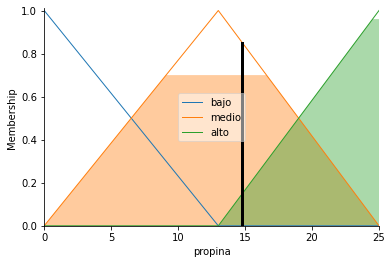

In [31]:
#Pasar entradas al ControlSystem usando etiquetas "Atecedent" con Pythonic API
#Nota: Si quiere pasar muchas entradas a la vez, usar .inputs(dict_of_data)
asignacion_propina.input['calidad'] = 6.5
asignacion_propina.input['servicio'] = 9.8

#Se obtiene el valor
asignacion_propina.compute()

#Se muestra la informacion
print("Valor de la propina: ")
print(asignacion_propina.output['propina'])

#Se muestra la curva de asignación de propina
propina.view(sim=asignacion_propina)